## Práctica 4: Interpolación.
Alfredo de Federico Ramos y David Kessler Martínez

In [69]:
import numpy as np

In [70]:
import matplotlib.pyplot as plt

In [71]:
" Función que define la función dada. Recibe el punto en el que será evaluada "

def f(x):
    return 1/(1+x*x)

In [94]:
def TablaDiferenciasDivididas (x,y):
    
    # Cogemos el número de puntos.
    n = np.size(x)
    
    # Y construimos la matriz que almacenará la tabla de diferencias divididas.
    T = np.zeros([n,n+1])
    
    # Y construimos el array que contendrá los coeficientes del polinomio de interpolación.
    coeficientes=np.zeros(n)
    
    # Guardamos en las dos primeras columnas los puntos y sus imágenes.
    for i in range (n):
        T[i,0] = x[i]
        T[i,1] = y[i]
    
    # Y llevamos a cabo los cálculos.
    for k in range (2,n+1):
        for j in range (k-1,n):
            # Dividimos los cálculos en numerador y denominador para simplificarlo
            num=T[j,k-1]-T[j-1,k-1]
            den=x[j]-x[j-k+1]
            
            # Y colocamos la división en la posición de la tabla adecuada.
            T[j,k]=num/den
 
    # Guardamos en el array de coeficientes la diagonal adecuada, que es la contiene los coeficientes del polinomio de interpolación.
    for q in range(n):
        coeficientes[q] = T[q,q+1]
    
    # Podemos mostrar la tabla de coeficientes descomentando lo siguiente:
    # print (T)
    
    # Y devolvemos este array.
    return coeficientes

In [95]:
" Función que dados dos listas que contienen los puntos de interpolación y los coeficientes del polinomio de interpolación"
" de Newton, devuelve el valor del polinomio de interpolación de Newton en un punto dado."

def PolinomioInterpolaciónNewton(x,coeficientes,punto):
    
    # Cogemos el número de puntos.
    n = np.size(x)
    
    # E inicializamos la suma
    suma = 0
    
    for i in range (n):
        
        # El sumando serán los valores de los coeficientes
        sumando=coeficientes[i]
        
        for j in range (i):
            # Que se multiplicarán por los anteriores (x-xi), y por el actual.
            sumando *= (punto - x[j])
        
        # Actualizamos la suma
        suma += sumando
    
    # Y devolvemos la suma.
    return suma

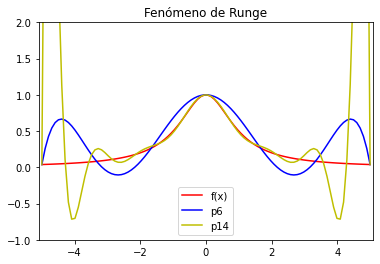

In [99]:
# Mostramos la gráfica
plt.title("Fenómeno de Runge")

# Cogemos puntos desde -5 hasta 5 para dibujar la función inicial.
xd = np.linspace(-5.0,5.0,100)

# Y calculamos sus imágenes
yd = f(xd)    
# Presentan un problema de redondeo, pero consideramos que no es significativo.

# La mostramos
plt.plot (xd, yd, 'r', label = "f(x)")

# Cogemos 7 puntos equidistantes entre -5 y 5 para el polinomio de grado 6.
xp6 = np.linspace (-5.0,5.0,7)

# Calculamos lás imágenes
yp6 = f(xp6)

# Calculamos los coeficientes del polinomio de interpolación dados estos puntos y sus imágenes:
coeficientes = TablaDiferenciasDivididas(xp6, yp6)

# Y evaluamos en 100 puntos según el polinomio de interpolación de grado 6 para poder dibujarlo.
for i in range (100):
    yd[i] = (PolinomioInterpolaciónNewton(xp6,coeficientes,xd[i]))

# Y la mostramos
plt.plot (xd, yd, 'b', label = "p6")

# Cogemos 15 puntos equidistantes entre -5 y 5 para el polinomio de grado 14.
xp14 = np.linspace (-5.0,5.0,15)

# Calculamos lás imágenes
yp14 = f(xp14)

# Calculamos los coeficientes del polinomio de interpolación dados estos puntos y sus imágenes:
coeficientes = TablaDiferenciasDivididas(xp14, yp14)

# Y evaluamos en 100 puntos según el polinomio de interpolación de grado 14 para poder dibujarlo.
for i in range (100):
    yd[i] = (PolinomioInterpolaciónNewton(xp14,coeficientes,xd[i]))

# Y la mostramos
plt.plot (xd, yd, 'y', label = "p14")

# Vamos a limitar los ejes para que la gráfica muestre exactamente lo que la imagen pedida.

plt.ylim(-1,2)
plt.xlim(-5.1,5.1)

plt.legend() # La leyenda
